# Warren 2020

## Abstract

*With the advent of modern neutrino and gravitational wave detectors, the promise of multi-messenger detections of the next galactic core-collapse supernova has become very real. Such detections will give insight into the core-collapse supernova mechanism, the structure of the progenitor star, and may resolve longstanding questions in fundamental physics. In order to properly interpret these detections, a thorough understanding of the landscape of possible core-collapse supernova events, and their multi-messenger signals, is needed. We present detailed predictions of neutrino and gravitational wave signals from 1D simulations of stellar core collapse, spanning the landscape of core-collapse progenitors from 9−120M⊙. In order to achieve explosions in 1D, we use the STIR model, which includes the effects of turbulence and convection in 1D supernova simulations to mimic the 3D explosion mechanism. We study the gravitational wave emission from the 1D simulations using an astroseismology analysis of the proto-neutron star. We find that the neutrino and gravitational wave signals are strongly correlated with the structure of the progenitor star and remnant compact object. Using these correlations, future detections of the first few seconds of neutrino and gravitational wave emission from a galactic core-collapse supernova may be able to provide constraints on stellar evolution independent of pre-explosion imaging and the mass of the compact object remnant prior to fallback accretion.*

### snewpy readme

Data from "Constraining properties of the next nearby core-collapse supernova with multi-messenger signals: multi-messenger signals" by Warren, MacKenzie; Couch, Sean; O'Connor, Evan; Morozova, Viktoriya.

1D FLASH simulations with STIR, for alpha_lambda = 1.23, 1.25, and 1.27.  Run with SFHo EOS, M1 with 12 energy groups.

For more information on these simulations, see Warren, Couch, O'Connor, & Morozova (arXiv:1912.03328) and Couch, Warren, & O'Connor (2020).

Includes the multi-messenger data from the STIR simulations. The filename indicates the turbulent mixing parameter a and progenitor mass m of the simulation.  Columns are time [s], shock radius [cm], explosion energy [ergs], electron neutrino mean energy [MeV], electron neutrino rms energy [MeV], electron neutrino luminosity [10^51 ergs/s], electron antineutrino mean energy [MeV], electron antineutrino rms energy [MeV], electron antineutrino luminosity [10^51 ergs/s], x neutrino mean energy [MeV], x neutrino rms energy [MeV], x neutrino luminosity [10^51 ergs/s], gravitational wave frequency from eigenmode analysis of the protoneutron star structure [Hz].  Note that the x neutrino luminosity is for one neutrino flavor - to get the total mu/tau neutrino and antineutrino luminosities requires multiplying this number by 4.

### Paper link

<https://arxiv.org/abs/1912.03328>

In [1]:
from sspike import pnut, beer
from sspike.supernova import Supernova
from sspike.detectors import Detector

## Progenitor options

- `mass`: 9-120 S.M.
- `stir`: 1.23, 1.25, or 1.27. 
- `t_start`: -1.5788002772705552 to -0.14218335144648592
 0.9401034948574578 to 4.847469976588053
- `t_end`: 0.9401034948574578 to 4.847469976588053

Note: Available masses and times are in sspike/sspike/aux/warren_times.json.  Seeing just the available masses is easier by looking at snewpy files.

In [2]:
model = 'Warren_2020'
progenitor = {'mass': 20.0,
              'stir': 1.25}
transformation = 'NoTransformation'
distance = 10.0

In [3]:
detector = Detector('kamland')
sn = Supernova(model, progenitor, transformation, distance)

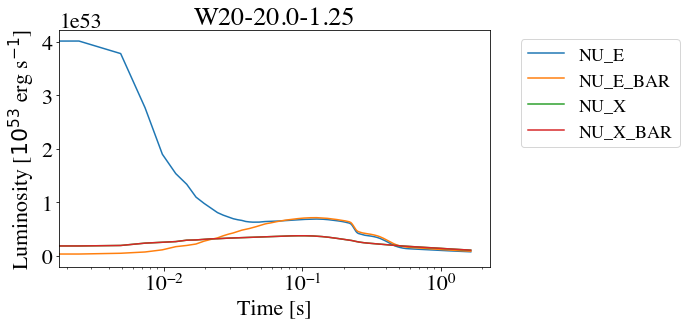

In [4]:
# lum = pnut.get_luminosities(sn)
beer.plot_luminosities(sn)

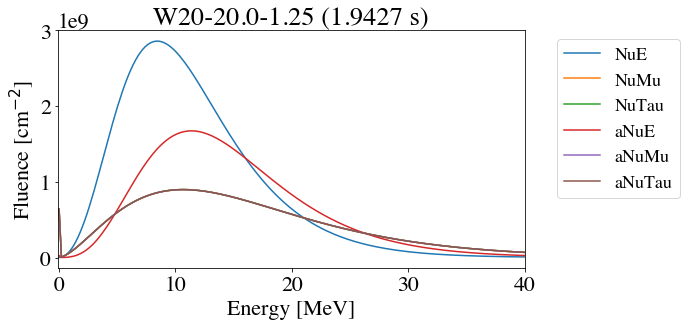

In [5]:
# fluences = pnut.get_fluences(sn)
beer.plot_fluences(sn)

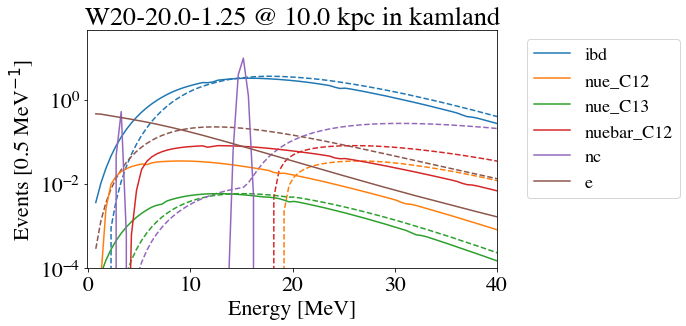

In [6]:
snow_events = pnut.snowglobes_events(sn, detector)
beer.plot_snowglobes_events(sn, detector)

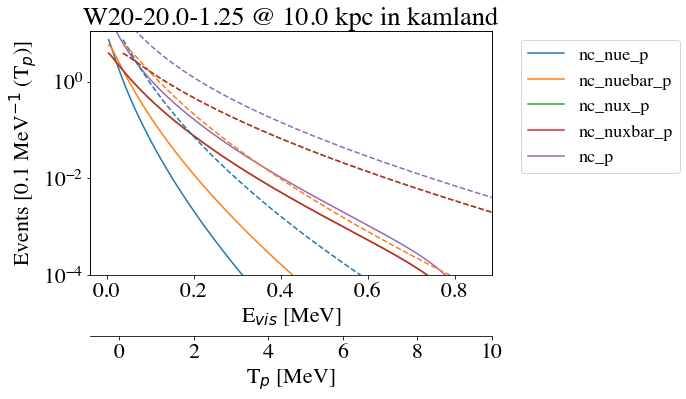

In [7]:
sspike_events = pnut.sspike_events(sn, detector)
beer.plot_sspike_events(sn, detector)

In [8]:
# totals = pnut.event_totals(sn, detector)
beer.bar_totals(sn, detector)

In [9]:
vis = pnut.vis_totals(sn, detector)
beer.bar_vis(sn, detector)

In [10]:
vis

,model,mass,stir,channel,events
0,Warren_2020,20.0,1.25,ibd,129.636868
1,Warren_2020,20.0,1.25,nue_C12,1.239809
2,Warren_2020,20.0,1.25,nue_C13,0.205354
3,Warren_2020,20.0,1.25,nuebar_C12,3.324475
4,Warren_2020,20.0,1.25,nc,15.800273
5,Warren_2020,20.0,1.25,e,8.320054
6,Warren_2020,20.0,1.25,nc_p,2.393239


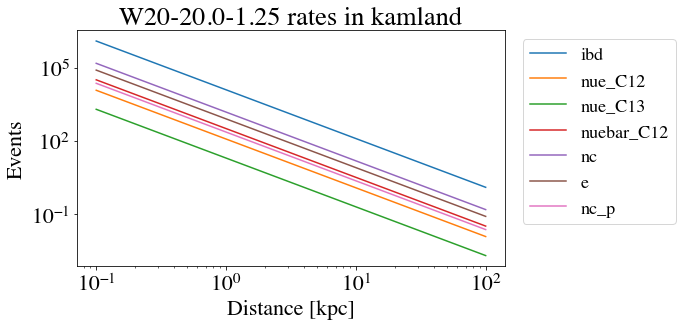

In [11]:
beer.plot_distance_rates(sn, detector)

## 500 ms time series

In [12]:
t_bins = 20
t_start = 0.0
t_end = 0.5
sn2 = Supernova(model, progenitor, transformation, distance, t_bins, t_start, t_end)

/Users/joe/opt/anaconda3/envs/KLSN/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



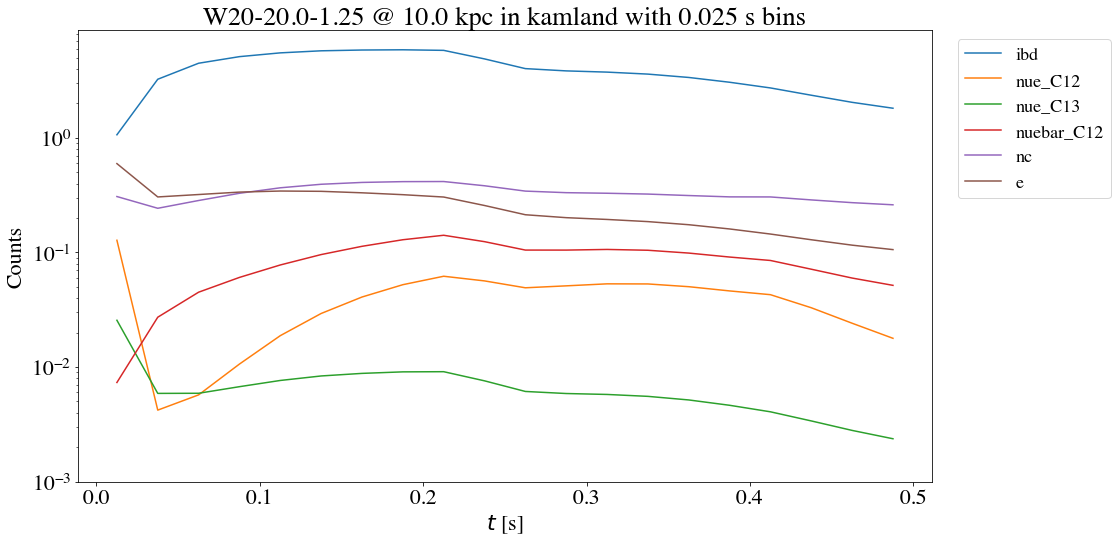

In [13]:
counts = pnut.time_events(sn2, detector)
beer.plot_series(sn2, detector)

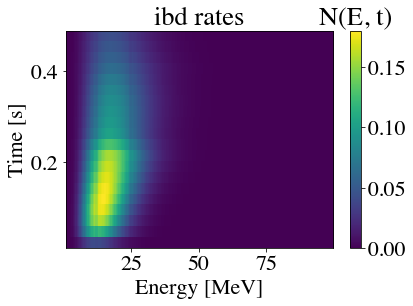

In [14]:
beer.plot_N_chan(sn2, detector, 'ibd')

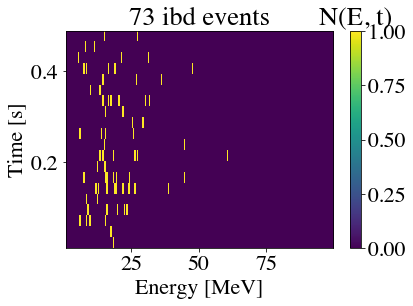

In [15]:
beer.plot_N_chan(sn2, detector, 'ibd', events=True, save=False)

## 500 ms totals

Single bin simulation to compare rates with random event generator.

In [16]:
sn3 = Supernova(model, progenitor, transformation, distance, 1, t_start, t_end)
snow = pnut.snowglobes_events(sn3, detector)
nc = pnut.sspike_events(sn3, detector)
tots = pnut.event_totals(sn3, detector)
vis = pnut.vis_totals(sn3, detector)
vis

/Users/joe/opt/anaconda3/envs/KLSN/lib/python3.8/site-packages/astropy/table/row.py:76: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



,model,mass,stir,channel,events
0,Warren_2020,20.0,1.25,ibd,78.303823
1,Warren_2020,20.0,1.25,nue_C12,0.828588
2,Warren_2020,20.0,1.25,nue_C13,0.140288
3,Warren_2020,20.0,1.25,nuebar_C12,1.700096
4,Warren_2020,20.0,1.25,nc,6.621134
5,Warren_2020,20.0,1.25,e,5.083529
6,Warren_2020,20.0,1.25,nc_p,0.645531


## 500 ms events by distance

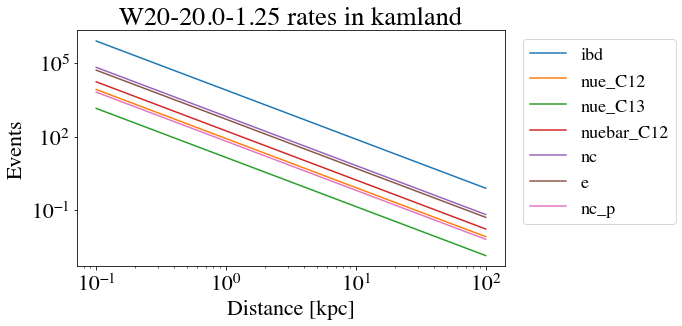

In [17]:
beer.plot_distance_rates(sn3, detector)